In [ ]:
#파라미터  -> 머신러닝이 '업데이트' 하는 요소(우리가 변경 불가)
#하이퍼파라미터 튜닝-> 옵션! 훈련을 시킬 때 우리가 선택할 수 있는 요소 ex)K-NN, K-means, DBScan(반경, 몇 명의 이웃)

In [ ]:
#DBSCAn -> 반경, 이웃의 수
# 반경 : 0.5 ~ 1.5 (경험)
# 이웃의 수 : 3 ~ 10 (경험)

#그리드 서치 -> 단계적으로 실험을 하면서 최적의 조합을 찾아내는!
#잘 나오는 하이퍼 파라미터를 대충 안다!
# 0.7, 0.8, 0.9
# 7, 8, 9, 10

#랜덤 서치
#뽑기.. 도박... > 진짜 감이 1도 안온다... > Best. 0.7~~~~
# 0.5 ~ 1.5
# 3 ~ 10

In [ ]:
#필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#머신러닝에 필요한 부분 임포트
#전체 데이터셋 X를 train(훈련용)과 test(검증용)으로 나누는 모듈 : train_test_split
from sklearn.model_selection import train_test_split
#분류의 '정확도(accuracy)' 를 알기 위한 모듈 : accuracy score
from sklearn.metrics import accuracy_score

#계층적 : 0번클래스 300명, 1번클래스 500명, 2번클래스 700명 -> 3:5:7 => 각 폴드를 같은 비율로! -> 계층적
#비계층적 : 3:3:3:
#계층적 KFold를 만드는 StratifiedKFold
#교차검증을 수행하는 cross_val_score -> K개의 폴드로 이루어진 데이터에 대해서 평균적인 성능을 계산해줌.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#데이터 변환 -> 전처리(결측치 메꾸기, 이상치 제거, 정규화, 스케일링)
#스케일을 맞추어주는 Standard Scaler
from sklearn.preprocessing import StandardScaler

#당뇨병 데이터셋(diabets) ,와인 데이터셋(wine)
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine

from sklearn.naive_bayes import GaussianNB

In [ ]:
raw = load_wine()

X = pd.DataFrame(raw.data, columns=raw.feature_names)
Y = pd.DataFrame(raw.target, columns=['target'])

df = pd.concat([X, Y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print(len(df))

178


In [ ]:
#훈련시키기 위해 우리가 가지고 있는 데이터 / 실제 데이터
#random_state : 시드 고정 -> 랜덤으로 뽑는 방식을 똑같이!
#1~30까지 중에서 3개 뽑기 => 연구 결과 똑같이 재현하기 위해서.
#random = 1 , 1, 7, 13
#random = 2 , 1, 6, 4
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=2025)

In [ ]:
print(len(x_train), len(x_test))

142 36


In [ ]:
178*0.8, 178*0.2

(142.4, 35.6)

In [ ]:
#모델의 정의
gnb = GaussianNB()

#모델의 훈련
#데이터를 쪼갰기 때문에, '훈련용' 데이터만 넣어줍니다.
#옛날에는 gnb.fit(X, Y) < 이렇게 X와 Y를 전부 다 넣어줬는데, 지금은 80%로 쪼갠 train 데이터만 넣어줌.
gnb.fit(x_train, y_train)

#예측 실행
#test용 x데이터를 넣어서, 얼마나 맞추는지 본다.
gnb_result = gnb.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#나의 가우시안 나이브 베이즈 모델이 훈련을 한 후에 x_test를 바탕으로 와인의 품종을 예측한 결과 -> 예측
print(gnb_result)

[0 0 0 0 2 0 0 0 1 2 1 0 2 0 1 1 1 2 1 0 1 0 0 1 2 1 0 2 2 0 0 0 1 0 0 1]


In [ ]:
#원래 가지고 있던 Y에서 x_test에 대응하는 y_test를 떼어낸 것 -> (찐 정답)
y_test

,target
0,0
48,0
26,0
19,0
136,2
1,0
5,0
23,0
80,1
139,2


In [ ]:
#y는 실제 정답인데 왜 test, train으로 나눌까요?
#x-train:y-train, x-test:y-test /

In [ ]:
#나 대신 정답과 예측을 비교하여 몇 퍼센트 맞췄는지 계산해줌 -> accuracy_score
accuracy_score(y_test, gnb_result)

1.0

In [ ]:
#KFold 정의하기
#nsplits = 몇 개의 폴드(K개) 정하기, shuffle=True면 데이터를 섞어서 다섯 덩어리로 나눔
skf = StratifiedKFold(n_splits=5, shuffle=True)

#교차 검증에 KFold 정의한 걸 넣어줌
#교차 검증을 할 때, 어떤 모델에, 어떤 X와 y를 넣어서, 어떤 K폴드 한 걸 -> 교차 검증 할거니?
gnb_accuracy = cross_val_score(estimator=gnb, #estimator == 모델
                               X=x_train,     #X = 훈련용 X데이터
                               y=y_train,     #y = 훈련용 y데이터
                               cv=skf)        #cv = kfold 정의한 내용

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
print(gnb_accuracy)

[1.         0.93103448 0.96428571 0.89285714 0.96428571]


In [ ]:
np.mean(gnb_accuracy)

np.float64(0.9504926108374384)

In [ ]:
#KNN으로 훈련 - 예측 - 교차검증까지 다 해보기
from sklearn.neighbors import KNeighborsClassifier

#모델 정의하기
knn = KNeighborsClassifier()

#x_train과 y_train으로 훈련하기
knn.fit(x_train, y_train)

#x_test로 정답 예측해보기(이 단계에서, knn모델에 y_test가 들어간 적이 없으므로 정말 '예측 결과' 만을 knn_Result에 저장
knn_result = knn.predict(x_test)

#진짜 정답(y_test)과 예측 결과(knn_result)를 비교하여, accuracy를 추출함
print(accuracy_score(y_test, knn_result))

0.8888888888888888


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn_kfold = cross_val_score(estimator=knn,
                            X=x_train,
                            y=y_train,
                            cv=skf) #5덩어리로 나누고, 섞어서 만들어주세요.

print(f"평균 정확도 : {np.mean(knn_kfold)}")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

평균 정확도 : 0.6697044334975369


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 앙상블 모델    

- 한 개의 모델을 쓰는 게 아니라, 여러개의 모델을 합쳐서 만든 모델(다수결... / 키메라...)     
- 일반적인 머신러닝 과제의 경우에는 '앙상블'을 쓰는게 무조건 좋음      

## 앙상블의 종류   
### 데이터의 특성에 따라서 성능이 다르지만, kaggle이나 데이콘에 가면 우승한 모델은 부스팅이 많다.
- 보팅(그냥 냅다 다수결 함)  ex)분류하는데 3모델이 0클래스라고 함, 2모델 1클래스라고 함 -> 그러면 0임  
- 배깅(독립적인 모델을 병렬적으로 사용함)    
- 부스팅(순차적으로, 이전 모델이 잘못 예측한 데이터에 가중치를 부여)

## 머신러닝이랑 딥러닝의 차이???
- 연산량
- 딥러닝은 신경망을 바탕으로 학습한다
- 은닉층으로 스스로 학습

=> 머신러닝은 왜 이런 결과가 나왔는지를 공식으로 설명 가능
딥러닝은 설명 불가. (공식 있음, 그러나 개별 데이터에 설명 불가)
-> explainable AI (설명가능한 AI)

## 머신러닝이랑 딥러닝의 데이터량

In [ ]:
#Decision Tree -> Random Forest
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류기
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier #AdaBoost(에이다부스트), XGBoost << 부스팅 중에서 유명한 애들

In [ ]:
#보팅 쓰는 법 : estimators 옵션에 각 모델을 리스트(튜플)로 감싸서 넣어준다.
#보팅에 weights=[1,2]의 [1,2]의 의미가 뭐인가요? -> 똑같이 1표씩 쓰는게 아니라 [1번 분류기는 1표, 2번 분류기는 2표]
vote = VotingClassifier(estimators=[
    ('1', KNeighborsClassifier()),
    ('2', GaussianNB())],
                        weights=[1,2]) #weights를 줌으로써 가중치를 설정할 수 있다.

vote.fit(x_train, y_train)
vote_result = vote.predict(x_test)
print("정확도 : ", accuracy_score(y_test, vote_result))

정확도 :  1.0


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


#보팅
-> 각자 다른 나라 국적을 가진 사람들이 찬반 투표      
-> 가치관이 다 다르기 때문에 다양한 의견이 나옴     


#배깅
-> 같은 나라 국민들이 찬반 투표   
-> 외국사람이랑 생각할 때랑은 비교적 비슷한 의견이 나옴

## 참고
https://medium.com/dawn-cau/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-%EC%9D%B4%EB%9E%80-cf1fcb97f9d0

In [ ]:
#배깅 -> 같은 모델을 데이터의 서로 다른 부분(복원추출)을 학습시켜서 다수결. 병렬적(동시에)으로!
bag = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=9)

bag.fit(x_train, y_train)
bag_result = bag.predict(x_test)
print(accuracy_score(y_test, bag_result))

0.8611111111111112


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#부스팅 <- 순차적으로, 이전의 모델이 잘못한 부분을 '가중치' 보완해가며 훈련한다.
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#그래디언트 부스팅을 정의(gb)
gb = GradientBoostingClassifier()

#gb에게 훈련 문제(x_train)와 답지(y_train)
gb.fit(x_train, y_train)

#gb야 공부를 했으니 문제를 풀어봐라(x_test) -> gb_result(얘가 푼 답)
gb_result = gb.predict(x_test)

#accuracy_score(찐 정답 vs 모델이 푼 답)
print(accuracy_score(y_test, gb_result))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9722222222222222


In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

#정의
ada = AdaBoostClassifier()

#훈련
ada.fit(x_train, y_train)

#예측
ada_result = ada.predict(x_test)

#평가
print(accuracy_score(y_test, ada_result))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9722222222222222


In [ ]:
#XGboost
#! -> 터미널에 이 명령어를 전달해줘~~
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train, y_train)

xgb_result = xgb.predict(x_test)

print(accuracy_score(y_test, xgb_result))

0.9722222222222222


 - XGBoost uses decision trees as weak learners and employs gradient descent with regularization techniques,
 - AdaBoost can use any algorithm that produces a binary output and relies on re-weighting samples.
 - https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/

# 모든 그래프 한번에 쓰고 성능 비교하기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    AdaBoostClassifier(),
    VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                 ('2', RandomForestClassifier()),
                                 ('3', SVC(kernel='linear'))])
]

In [ ]:
classifier_names=['DT',
                  'RF',
                  'NB',
                  'KNN',
                  'SVC_l',
                  'SVC_c',
                  'Ada',
                  'Voting']

In [ ]:
model_accuracy =[]
model_names = []
model_means = []

#KFold 교차검증 수행할 수 있도록 정의
skf = StratifiedKFold(n_splits=5, shuffle=True)

classifier_datas = zip(classifier_names, classifiers)

#모든 모델의 집합을 for문으로 돌려보기 위해~
for name, model in classifier_datas:

  #교차검증 코드 -> 어떤 모델 쓸거니, 어떤 x데이터 쓸거니, 어떤 y라벨 쓸거니, kfold 어떻게 할거니.
  accuracy = cross_val_score(
      estimator=model,
      X=x_train,
      y=y_train,
      cv=skf
  )

  #정확도의 평균값 출력
  #5폴드 교차 검증의 정확도를 평균(mean)
  # : .2f -> 소수 둘째자리까지 표현
  print(f"{name} 모델의 mean_acc = {accuracy.mean()*100:.2f}")

  model_accuracy.append(accuracy)
  model_means.append(accuracy.mean()*100)
  model_names.append(name)

DT 모델의 mean_acc = 93.69


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RF 모델의 mean_acc = 97.17
NB 모델의 mean_acc = 96.45
KNN 모델의 mean_acc = 67.66


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

SVC_l 모델의 mean_acc = 94.36
SVC_c 모델의 mean_acc = 64.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Ada 모델의 mean_acc = 95.74


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Voting 모델의 mean_acc = 96.50


In [ ]:
min(model_means)

np.float64(64.75369458128078)

<BarContainer object of 8 artists>

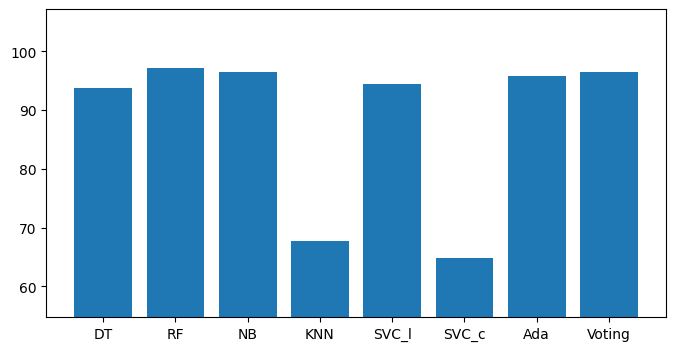

In [ ]:
#matplot => 도화지, 그림
#plt.figure() => 도화지에 그림을 그림
#plt.subplots() => 도화지를 접어서 / 각각의 행열에 그림을 그리는

#figsize=도화지 크기
plt.figure(figsize=(8, 4))

#y눈금의 최소, 최대값
#그래프의 여유공간
# min(model_means) - 10  vs max(model_means) + 10
plt.ylim([min(model_means)-10, max(model_means)+10])

#막대그래프(bar) names를 x축으로, means를 y축으로!
plt.bar(model_names, model_means)